# House Prices - Advanced Regression Techniques (15%)

Mar-2021
<br>
<br>
Author: brugmark



## Introduction
In this notebook I will share my approach to predict house sale prices. I learned a lot looking at other notebooks (thanks!) and hopefully you can learn from this one or comment to improve it further! :-)
<br>
<br>
To structure my notebook I decided to use the CRISP-DM methodology (see image below). However, I skipped the last two phases (Evaluation and Deployment) because this is not a business assignment and the algorithm will not be deployed. As a result, the following phases remain:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
<br>
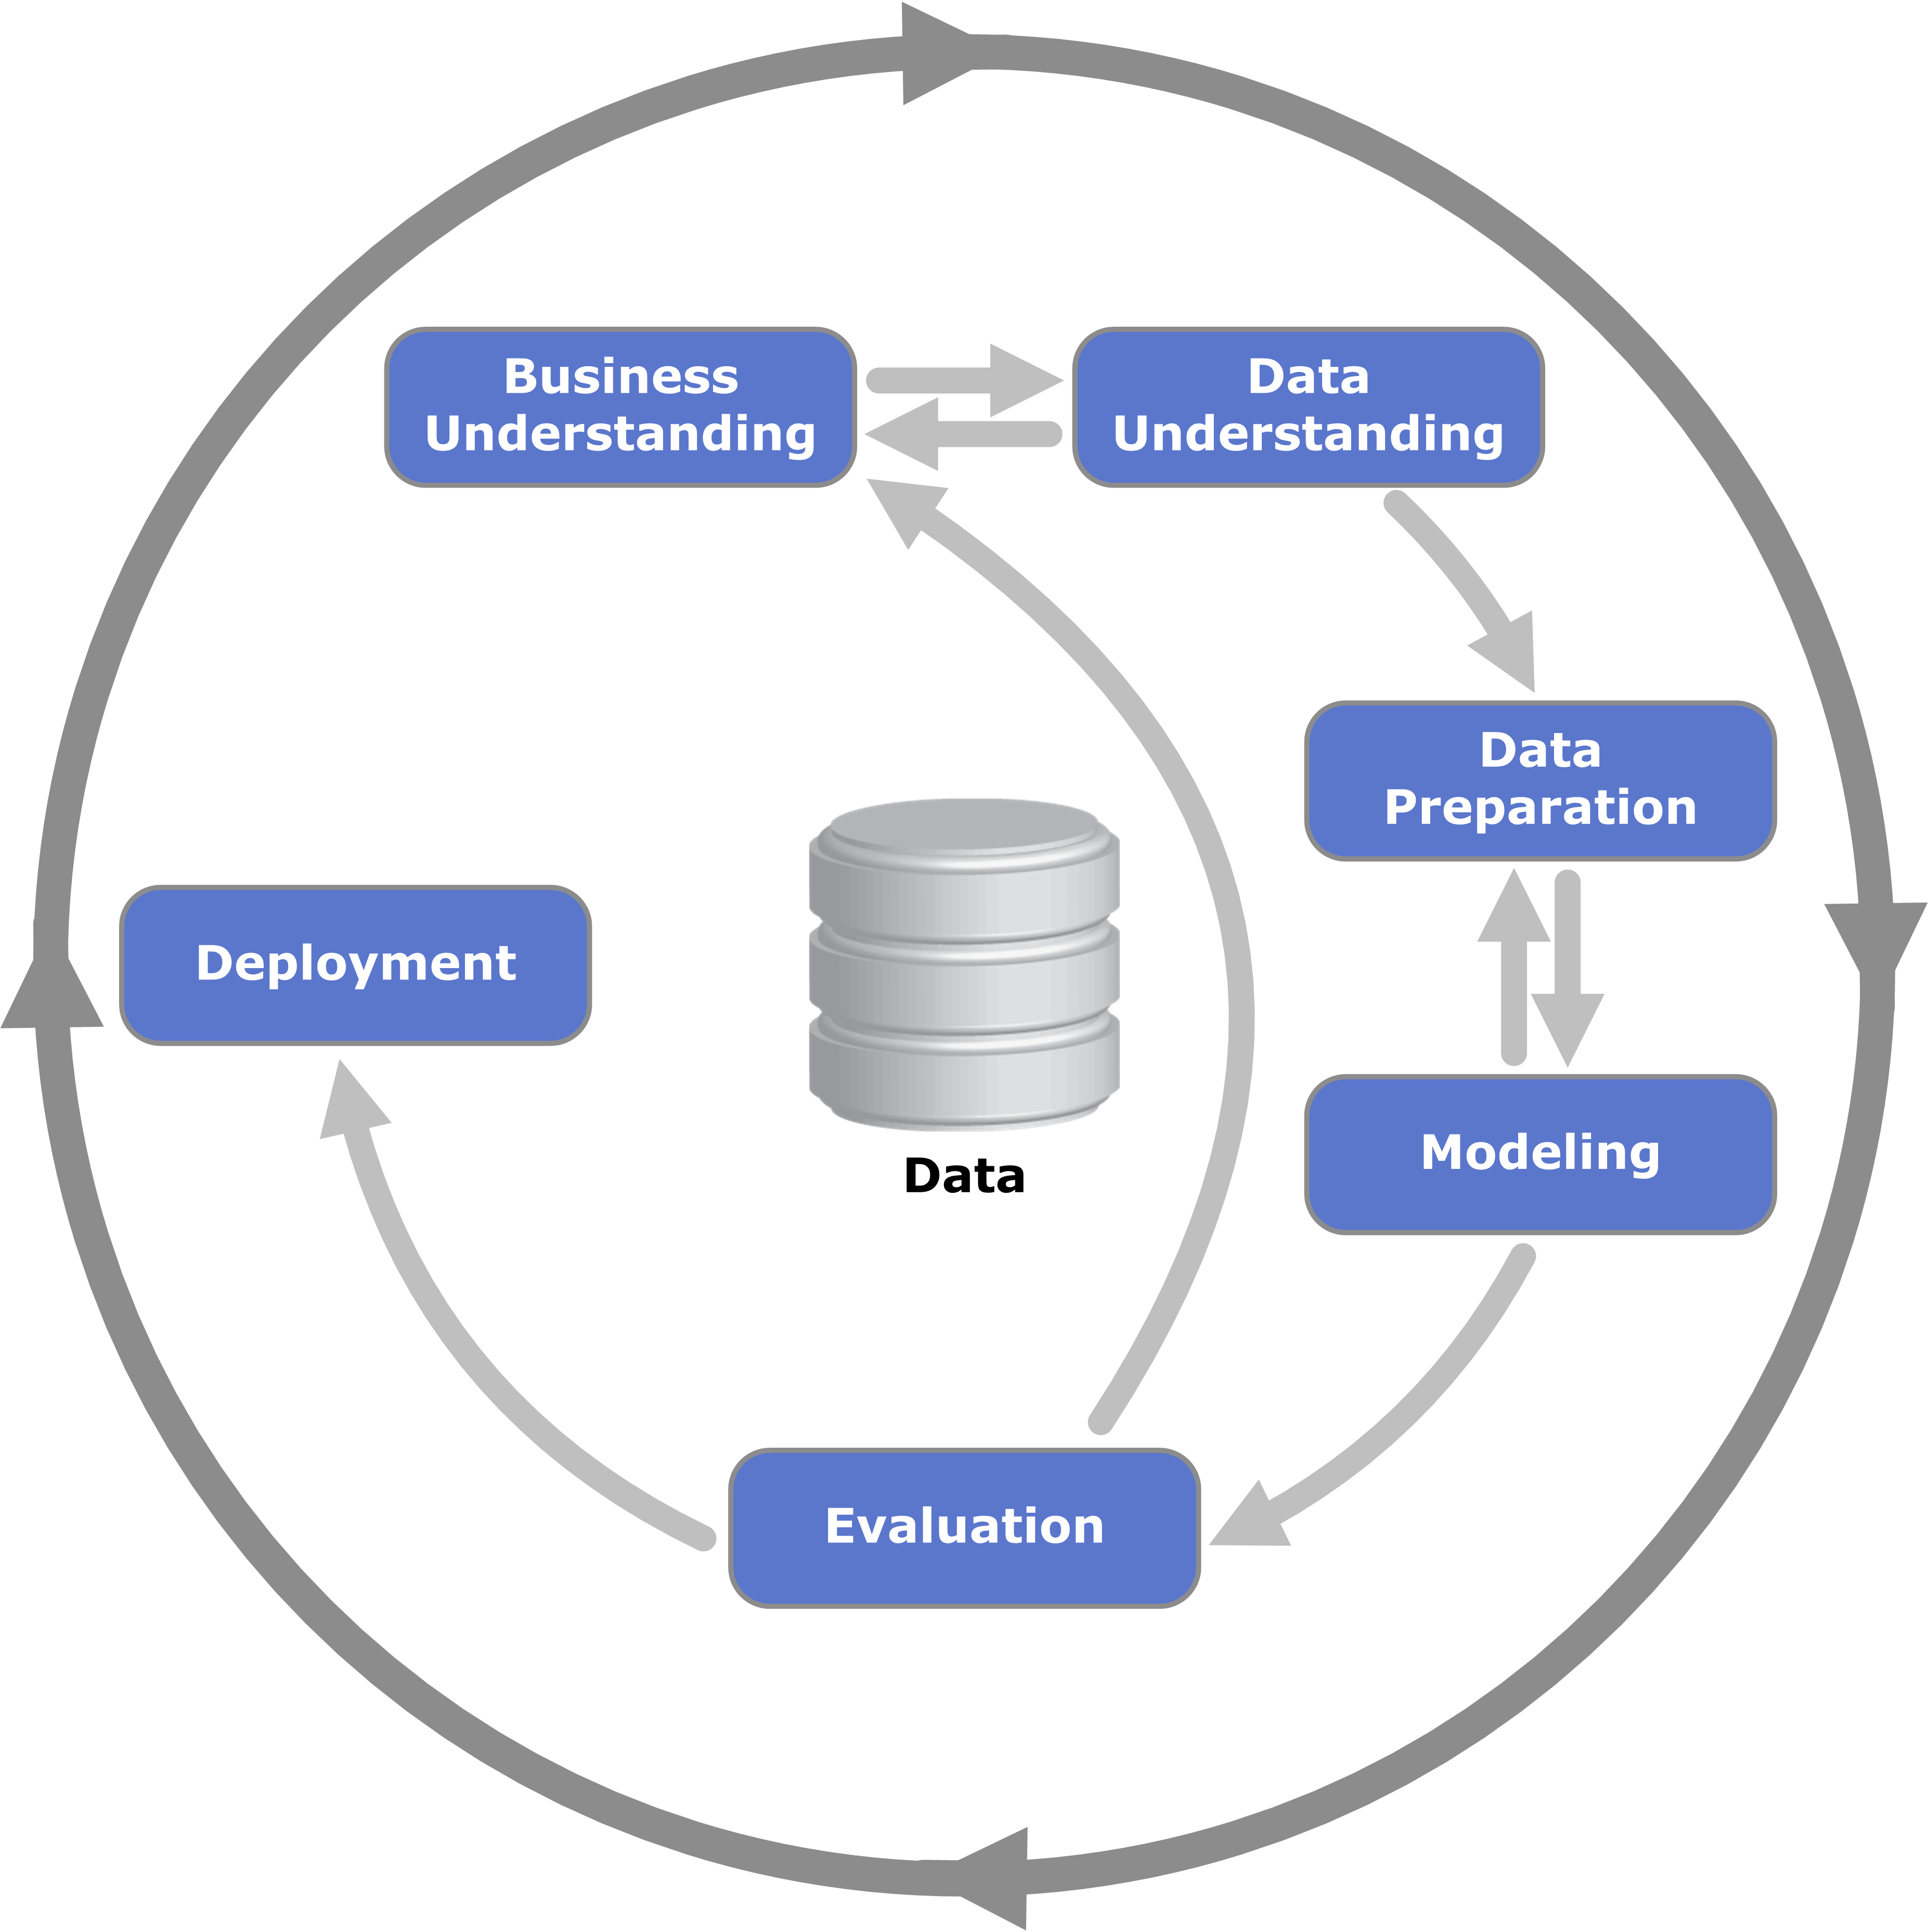

But first, let's import some modules.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFECV

# 1. Business Understanding
<br>
At the start of a data science project, the business and data science objectives are defined. However, in this case, because it is not a business assignment stating a single objective will suffice: 
<br>

*The objective is to create a notebook that predicts house sales prices*

# 2. Data Understanding

To improve our understanding of the data, we will:
- Collect data
- Describe data
- Explore data
- Verify data quality

### Collect

In [2]:
train0 = pd.read_csv(r'C:\Users\MBRU\OneDrive - boskalis.com\Files\Personal\Kaggle\House Prices Advanced Regression Techniques\train.csv')
test0 = pd.read_csv(r'C:\Users\MBRU\OneDrive - boskalis.com\Files\Personal\Kaggle\House Prices Advanced Regression Techniques\test.csv')

Next, the train and test data are combined, but these can also be kept separately.

In [3]:
data = pd.concat([train0, test0], axis=0).reset_index(drop=True)

### Describe

Check the number of rows and columns in the data frame.

In [4]:
data.shape

(2919, 81)

Generate some descriptive statistics.

In [5]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000  ...   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235  ...   
std       1.113131    30.291442     20.894344   179.334253   455.610826  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  2919.000000  2919.000000    2919.000000  2919.000000  2919.000000   
mean     93.709832    47.486811      23.098321     2.602261    16.062350   
std     126.526589    67.575493      64.244246    25.188169    56.184365   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    26.000000       0.000000     0.000000     0.000000   
75%     168.000000    70.000000       0.000000     0.000000     0.000000   
max    1424.000000   742.000000    1012.000000   508.000000   576.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  2919.000000   2919.000000  2919.000000  2919.000000    1460.000000  
mean      2.251799     50.825968     6.213087  2007.792737  180921.195890  
std      35.663946    567.402211     2.714762     1.314964   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     4.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     800.000000  17000.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

Determine data types. As is shown below, there are quite some "object" (categorical) data types in addition to "float64" and "int64" (numerical). 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Next, the numerical and categorical data are split, because we will treat them differently in subsequent steps.

In [7]:
data_num = data._get_numeric_data()
data_cat = pd.concat([data.drop(data_num.columns, axis=1), data['SalePrice']], axis=1)

### Explore
There are many ways to explore data. In this case we will: 
1. Focus on the (potential) relation between variables (correlations)
2. Plot histogram to determine how the data is distributed (normally or skewed)

First, the correlations are calculated per numerical variable and, if the correlation with SalePrice is > 0.5, it is depicted in the heatmap below. It shows that, for instance, the overall quality of the house (OverallQual) and ground floor living area (GrLivArea) have the highest correlation with SalePrice (respectively 0.79 and 0.71).

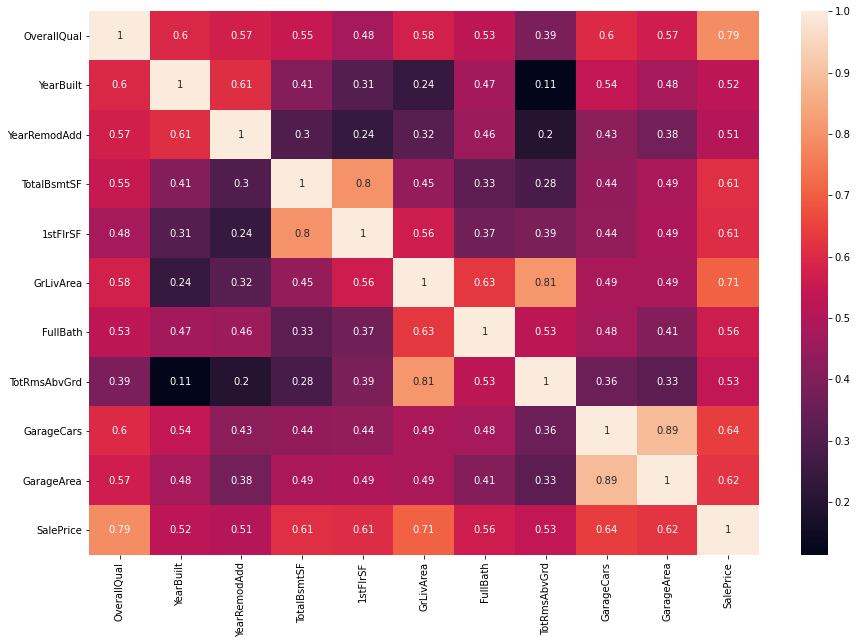

In [8]:
plt.figure('Correlation matrix', figsize=(15,10))
corr_matrix = data_num.corr().round(2)
top_corr = corr_matrix.index[abs(corr_matrix['SalePrice']) > 0.5]
corr_heat = sns.heatmap(data=data_num[top_corr].corr(), annot=True)

To shed light on the relation between the categorical variables and SalePrice, per variable the mean SalePrice is calculated for each associated category and these are ordered from the lowest to the highest mean SalePrice (see below). It shows that, for instance, the mean SalePrice is highest for MSZoning category "FV" (SalePrice = 214014.061538).

<ipython-input-9-42c6ee2b296d>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(col + ' bar chart')


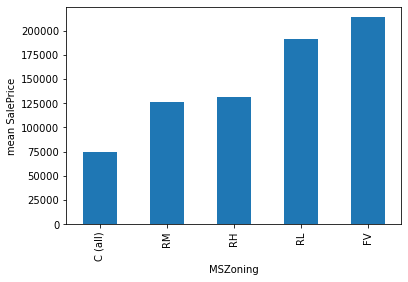

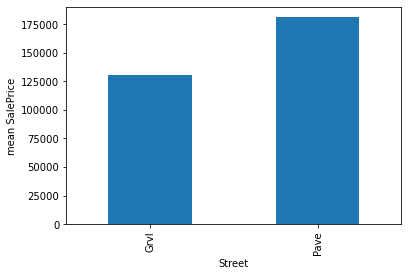

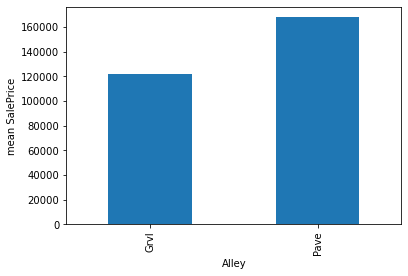

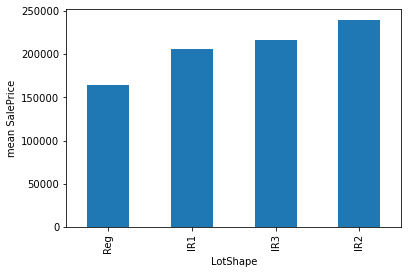

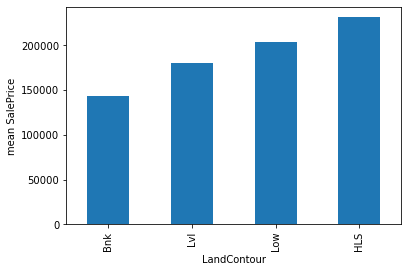

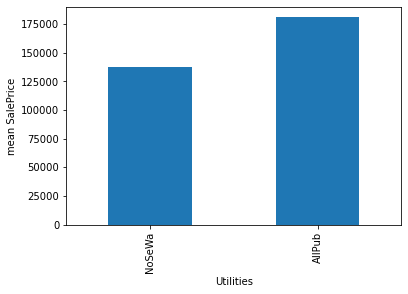

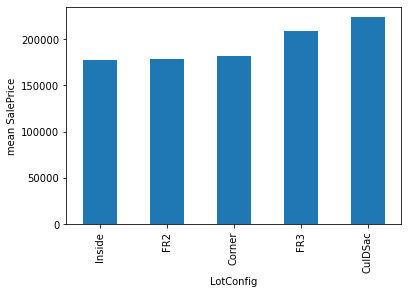

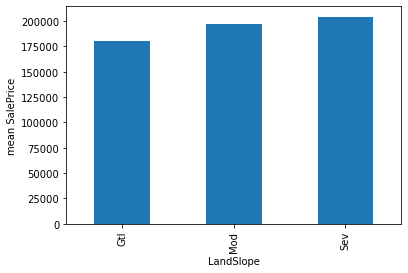

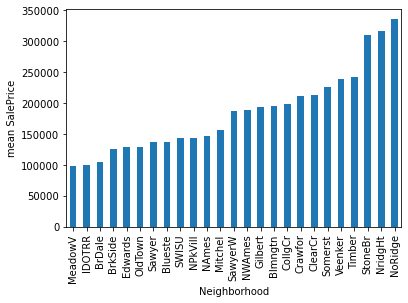

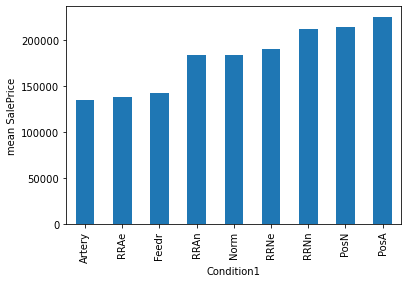

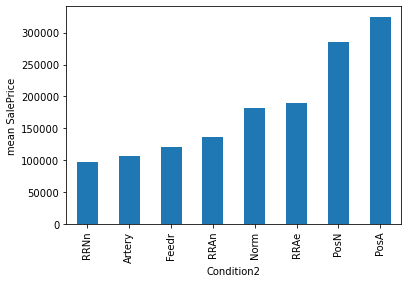

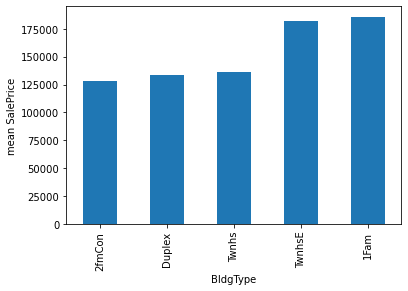

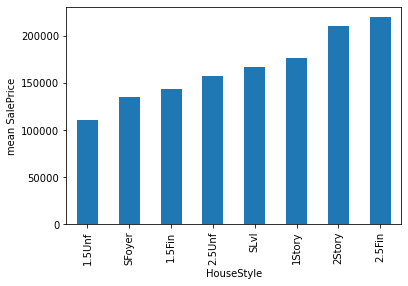

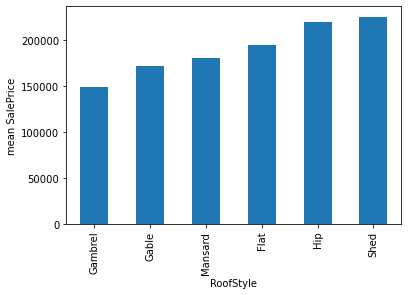

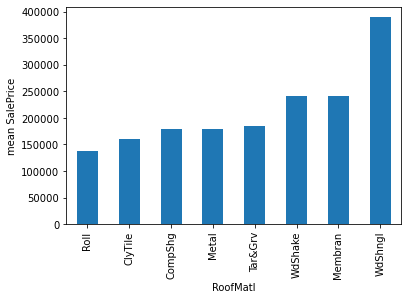

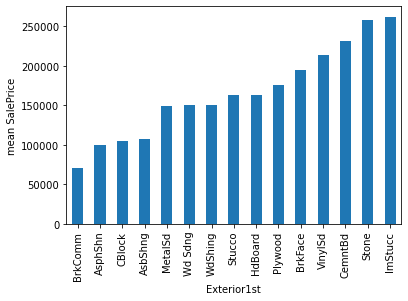

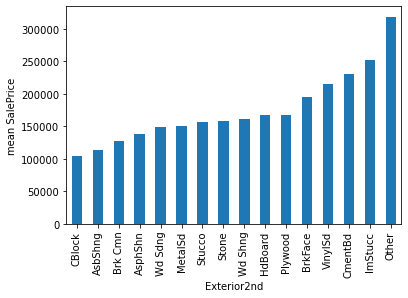

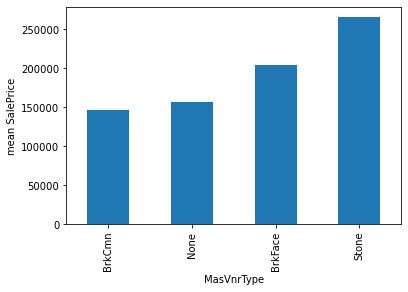

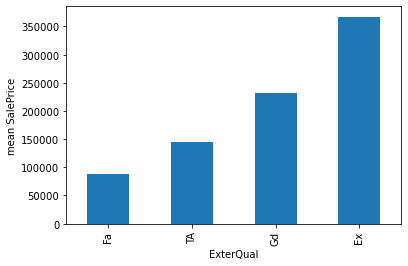

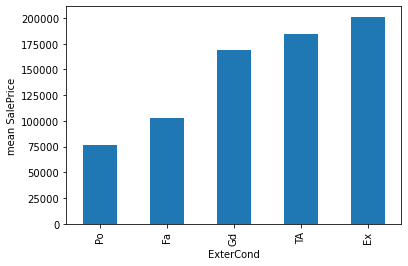

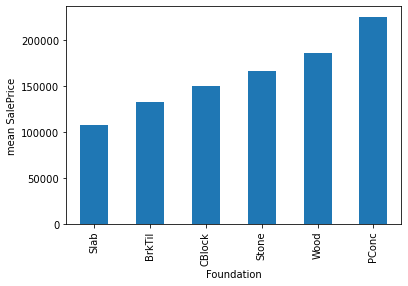

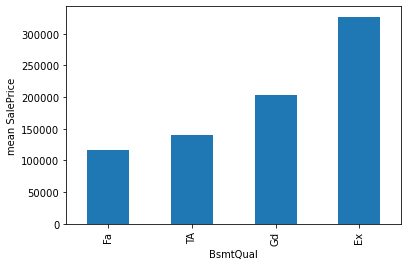

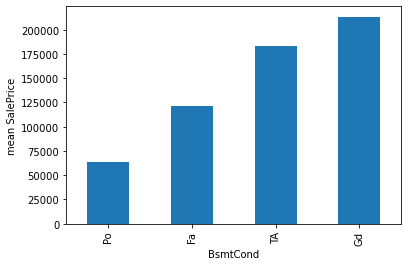

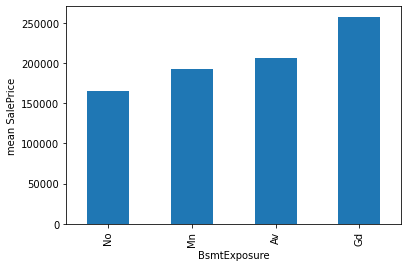

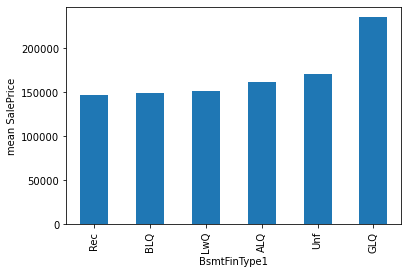

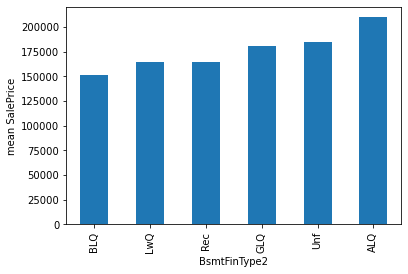

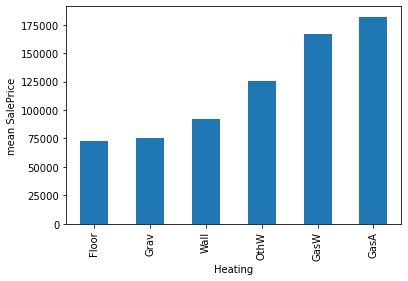

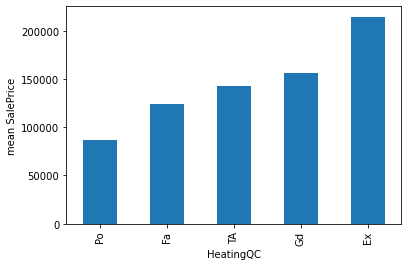

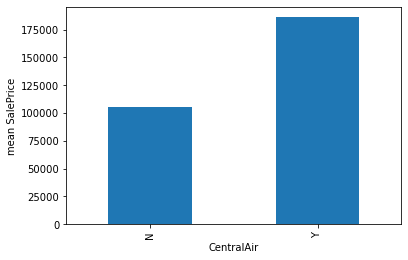

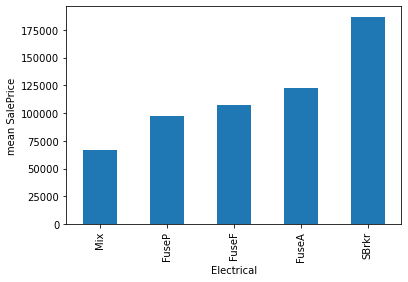

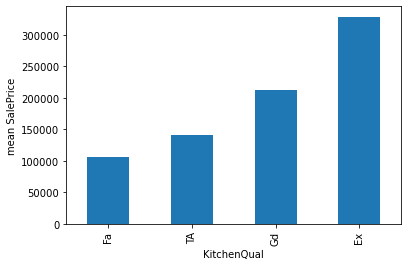

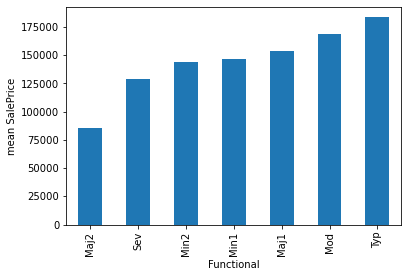

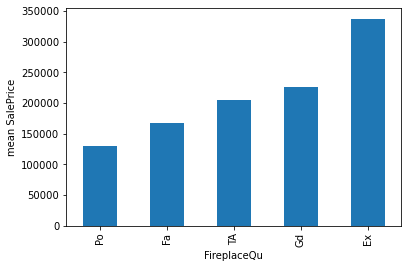

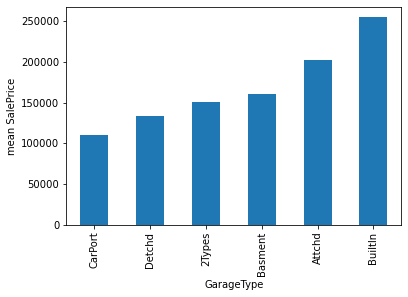

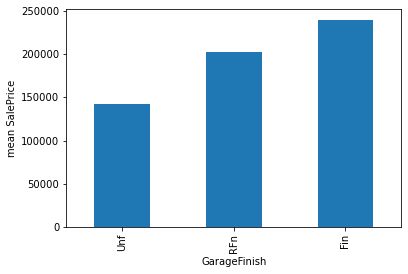

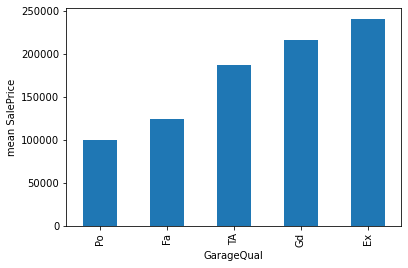

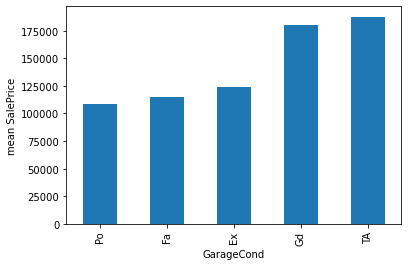

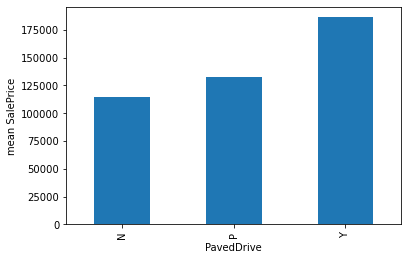

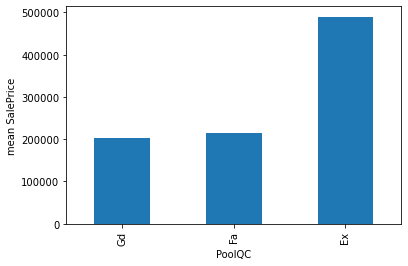

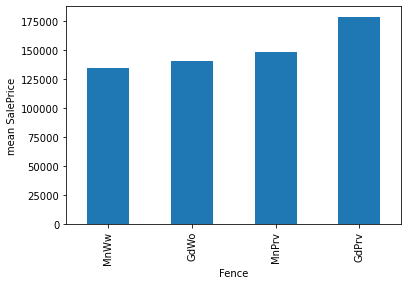

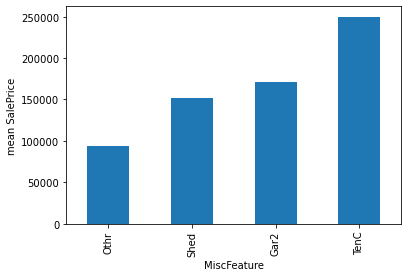

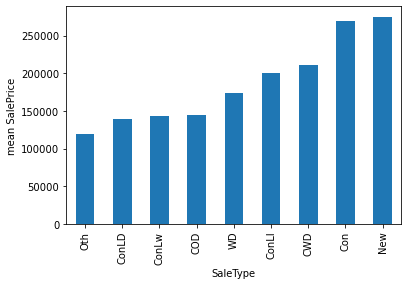

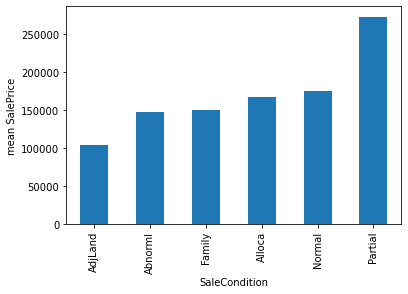

In [9]:
dic_cat = {}
data_cat_dv = data_cat['SalePrice']
data_cat['SalePrice'] = data_cat_dv
for col in data_cat.columns[:-1]:
    plt.figure(col + ' bar chart')
    plt.ylabel('mean SalePrice')
    dic_cat[col] = data_cat.loc[:, [col, 'SalePrice']].groupby(col).agg(['count', 'mean']).sort_values(by=[('SalePrice', 'mean')], ascending=True)
    dic_cat[col]['#'] = list(range(0, len(dic_cat[col])))
    dic_cat[col]['SalePrice', 'mean'].plot(kind='bar')

data_cat.drop('SalePrice', axis=1, inplace=True)

To determine how many value counts are in each category we will plot some more bar charts. It shows that the variability of some categorical variables is quite limited like, for instance, is the case for "Street".

<ipython-input-10-88f594552c02>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(col + 'count bar chart')


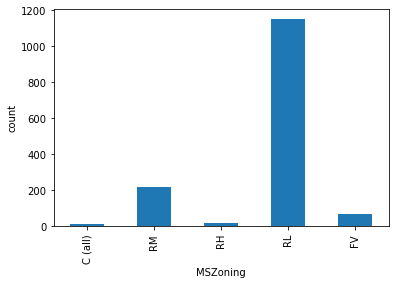

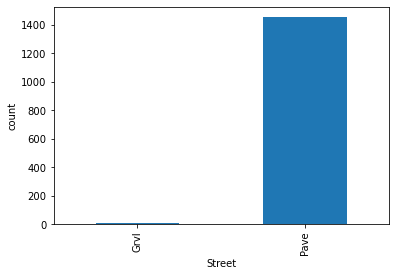

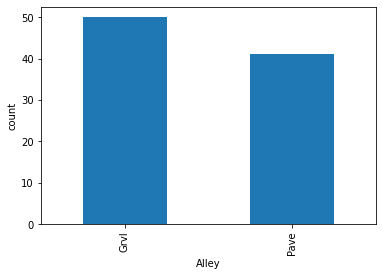

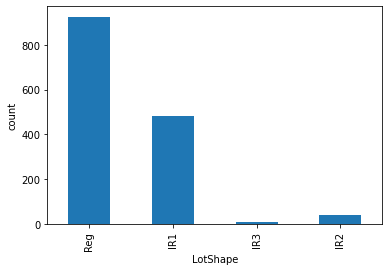

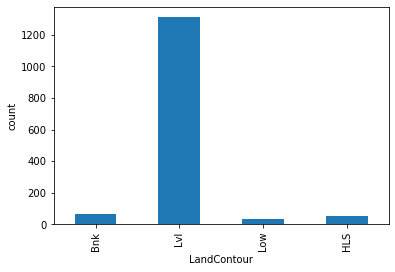

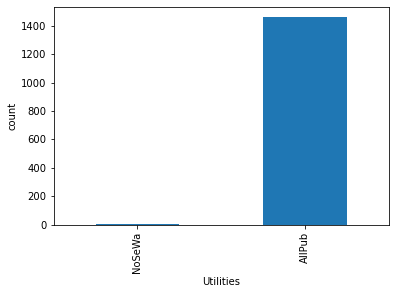

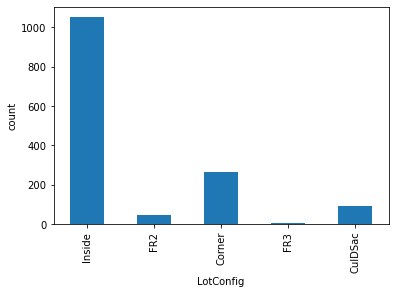

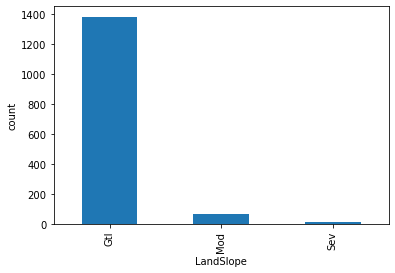

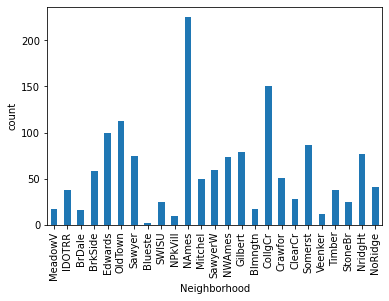

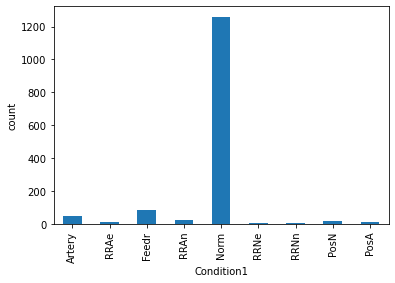

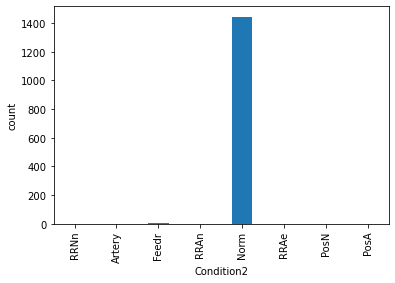

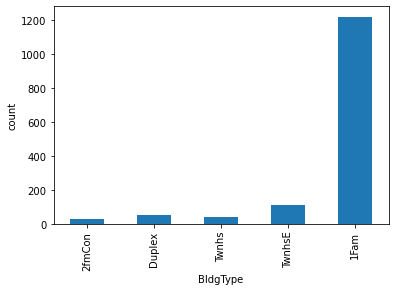

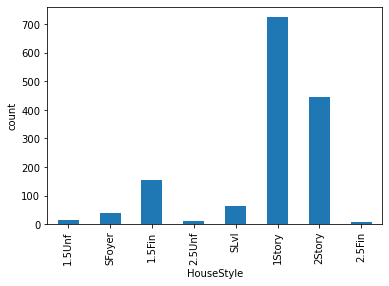

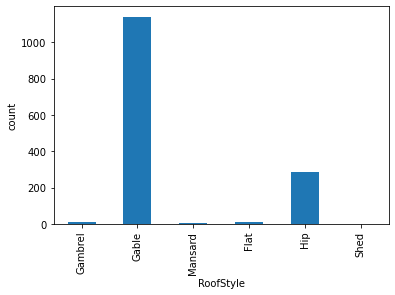

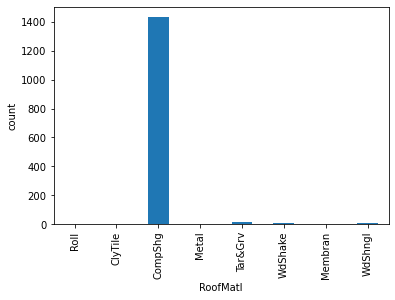

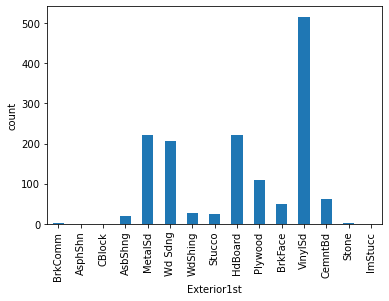

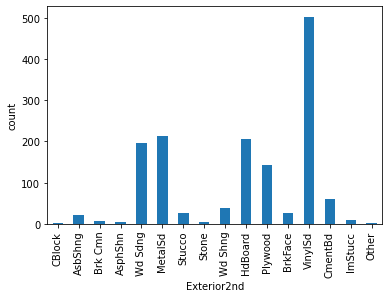

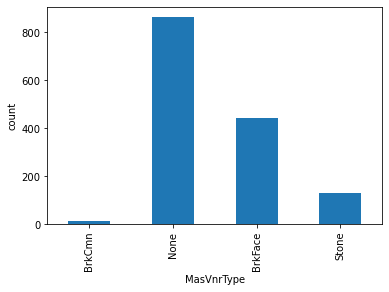

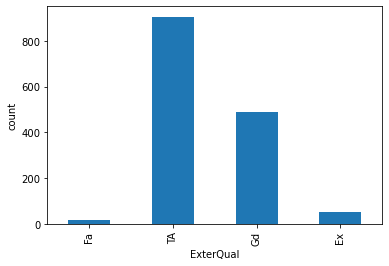

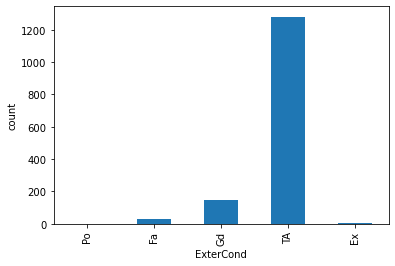

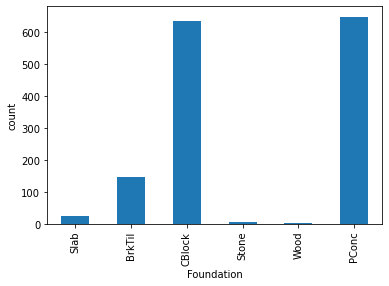

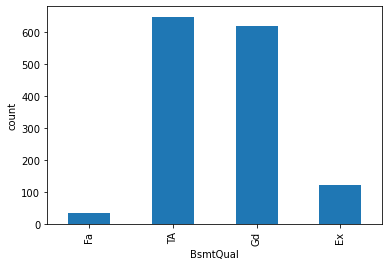

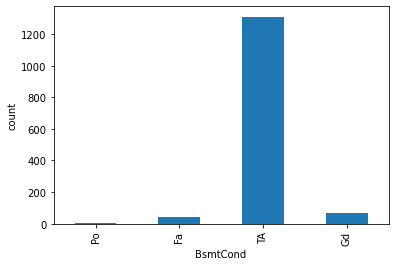

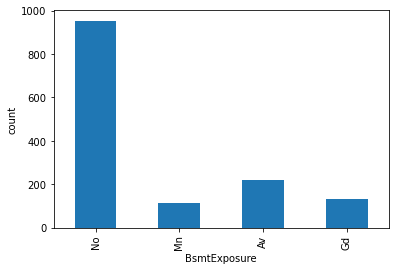

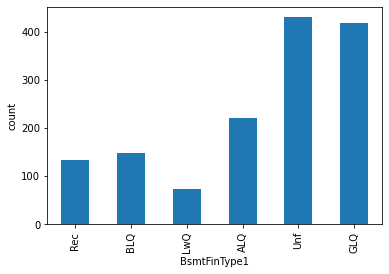

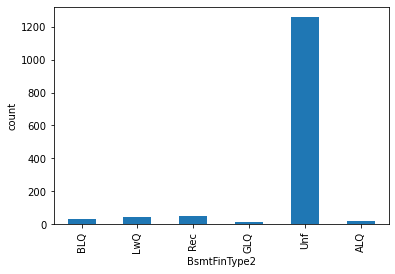

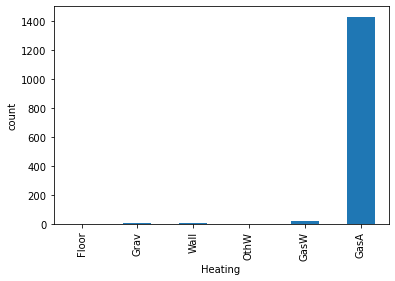

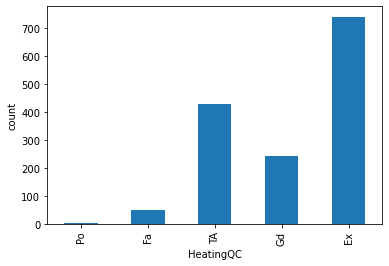

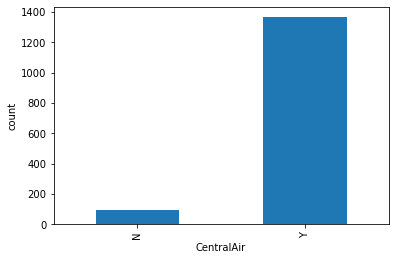

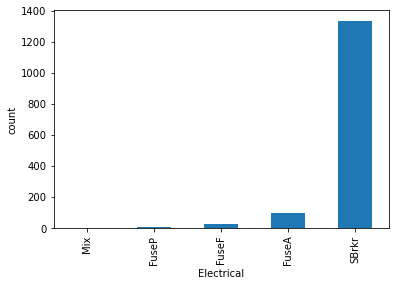

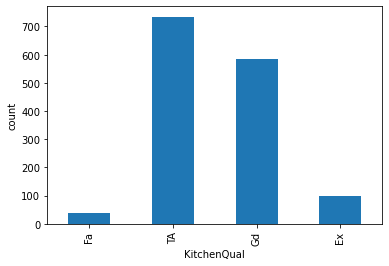

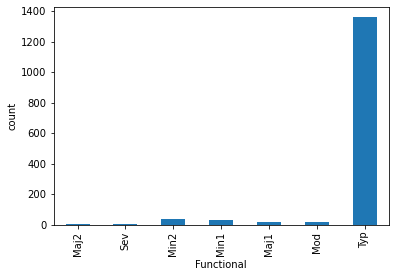

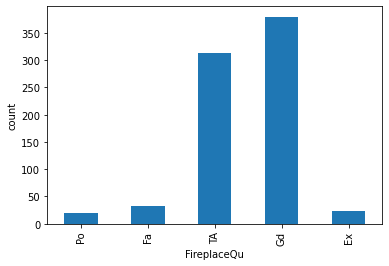

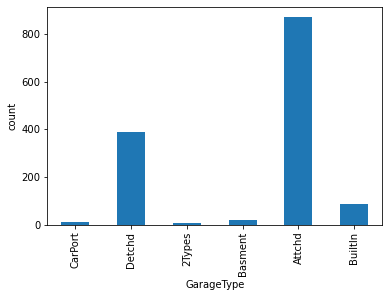

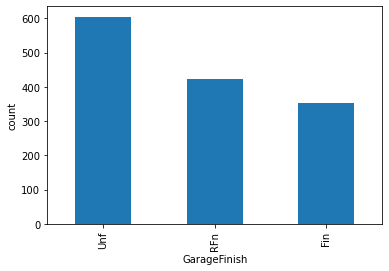

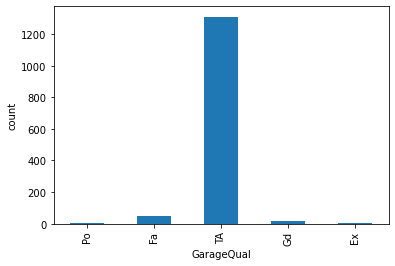

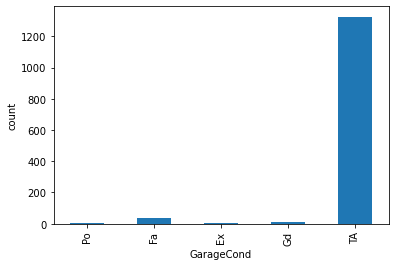

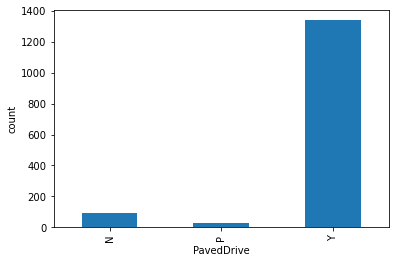

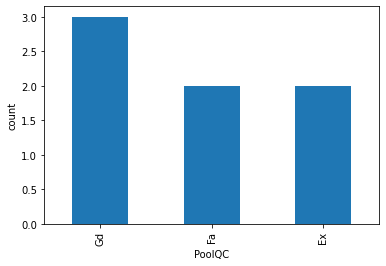

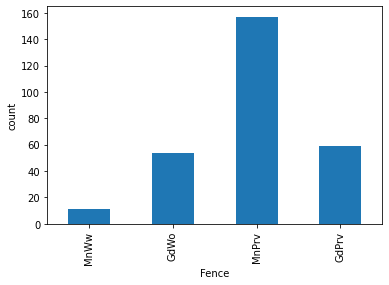

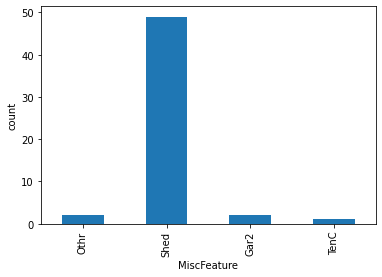

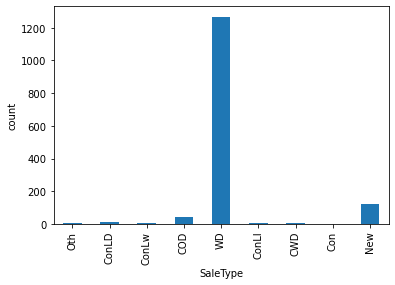

In [10]:
for col in data_cat.columns[:-1]:
    plt.figure(col + 'count bar chart')
    plt.ylabel('count')
    dic_cat[col]['SalePrice', 'count'].plot(kind='bar')

Next, we create a histogram for SalePrice. It reveals that its distribution is right skewed.

<AxesSubplot:ylabel='Frequency'>

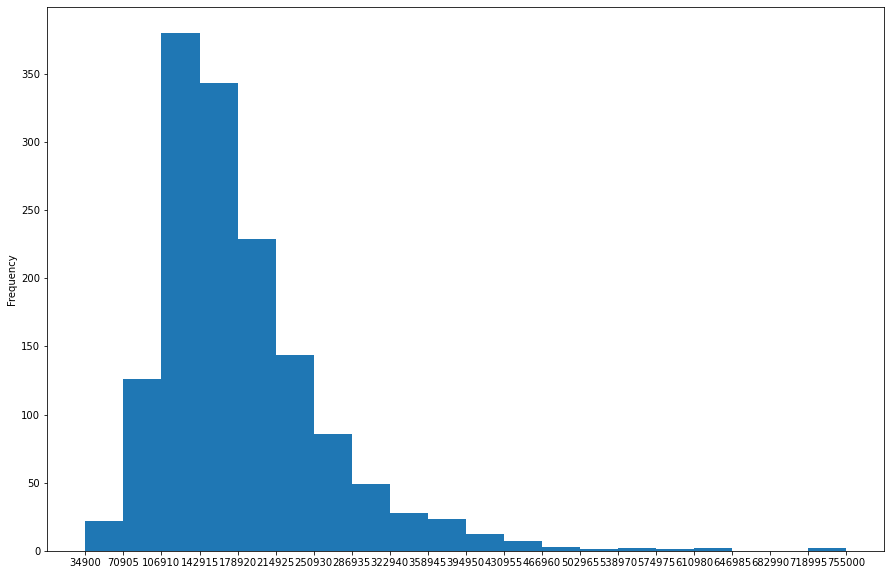

In [11]:
# Check distribution dv
plt.figure('SalePrice histogram', figsize=(15,10))
count, bin_edges = np.histogram(data['SalePrice'].dropna(), 20)
data['SalePrice'].plot(kind='hist', bins=20, xticks=bin_edges)

### Verify data quality

To verify the data quality we will look at: 
1. Missing data
2. Potential outliers

First, let's take a look at missing numerical data. The bar plot below shows that, especially for LotFrontage, GarageYrBlt, and MasVnrArea, there is quite some data missing.

<AxesSubplot:ylabel='Missing data [%]'>

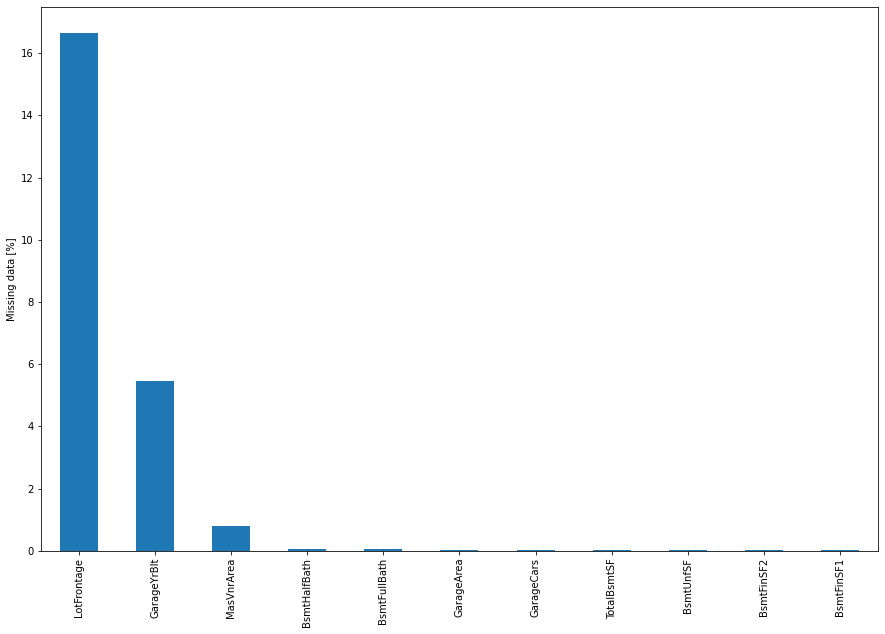

In [12]:
plt.figure('Missing numerical data', figsize=(15,10))
plt.ylabel('Missing data [%]')
data_nan = (data_num.isnull().sum() / len(data)) * 100
data_nan = data_nan[data_nan > 0].sort_values(ascending=False)
data_nan[1:].plot(kind='bar')

Next, let's take look at missing categorical data. The bar plot below shows that for multiple variables quite some data missing.

<AxesSubplot:ylabel='Missing data [%]'>

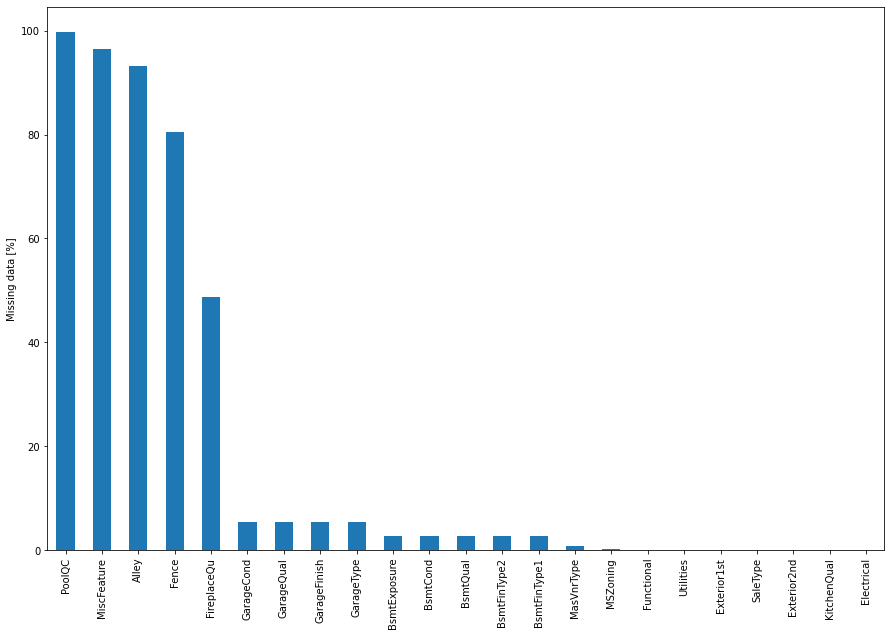

In [13]:
plt.figure('Missing categorical data', figsize=(15,10))
plt.ylabel('Missing data [%]')
data_nan = (data_cat.isnull().sum() / len(data)) * 100
data_nan = data_nan[data_nan > 0].sort_values(ascending=False)
data_nan.plot(kind='bar')

Now, we will attempt to identify potential outliers. These are flagged by calculating the z-score. This represents how many standard deviations a value deviates from the mean. The farther away, the more likely the value is an outlier. In the plots below, any value with a z-score of 3 or more is colored red. 

Please keep in mind that red indicates a potential outlier and not necessarily an actual outlier!

<ipython-input-14-03fa7ad4f11a>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(col + ' outliers')


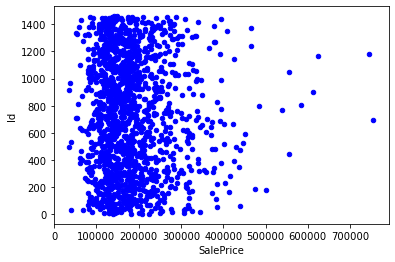

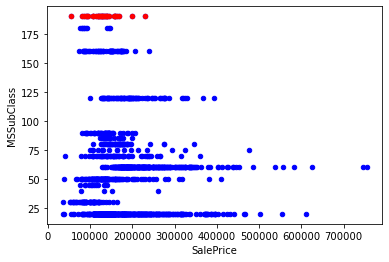

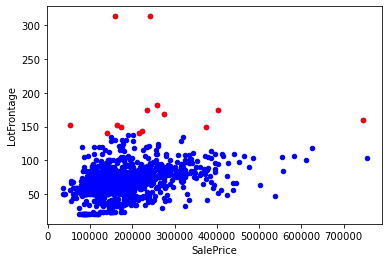

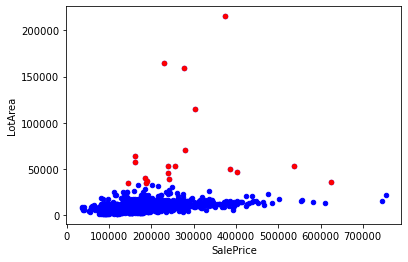

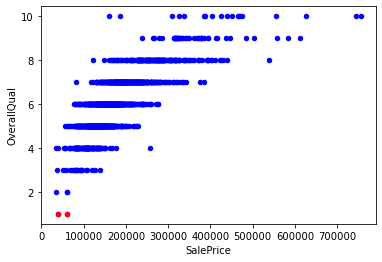

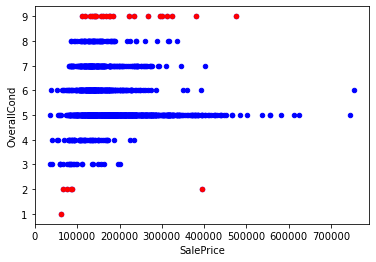

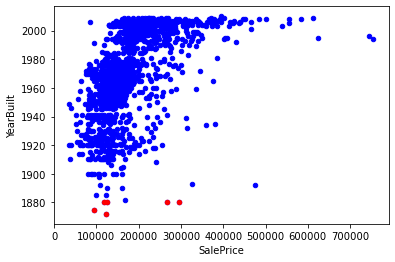

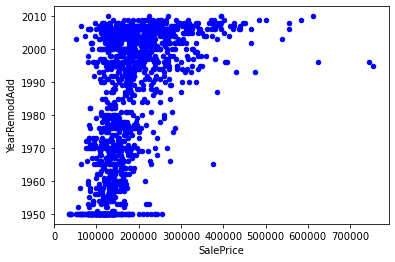

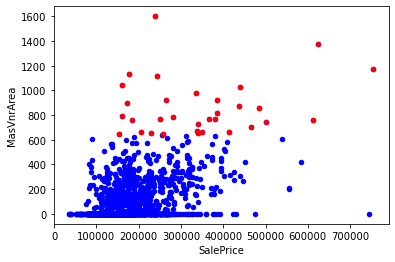

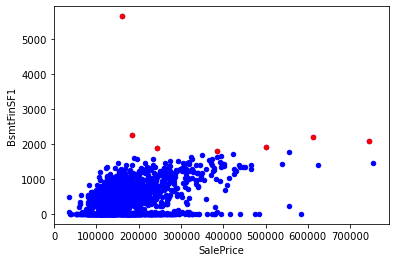

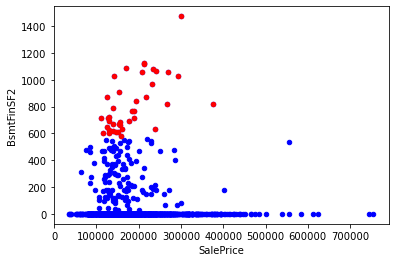

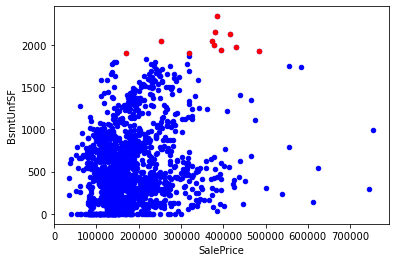

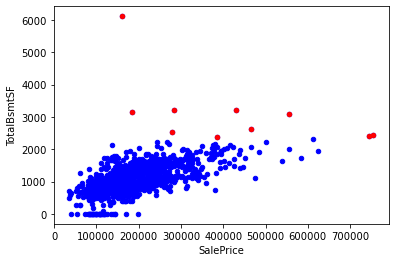

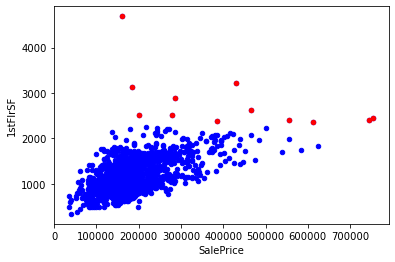

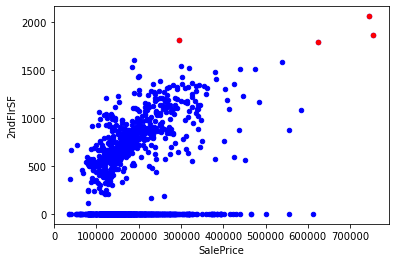

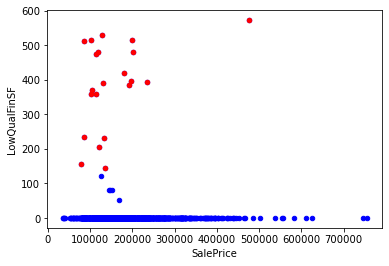

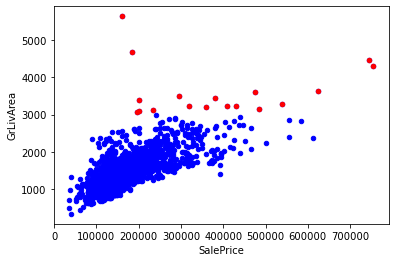

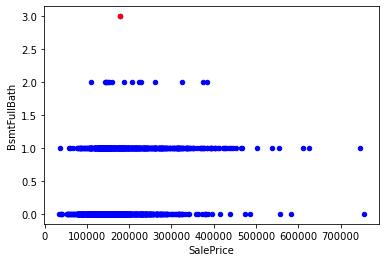

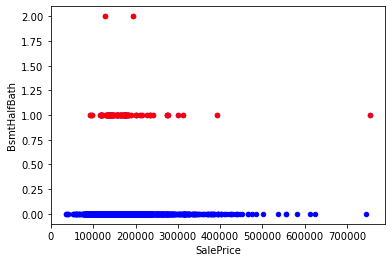

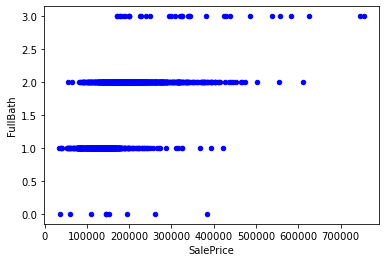

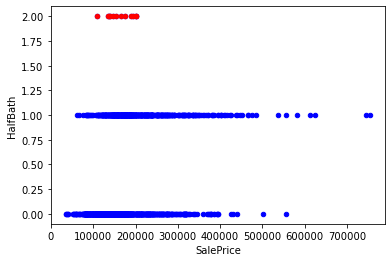

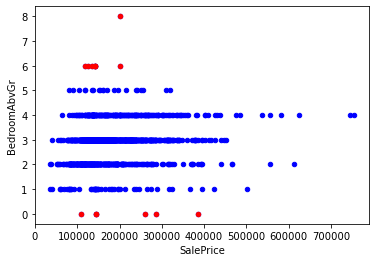

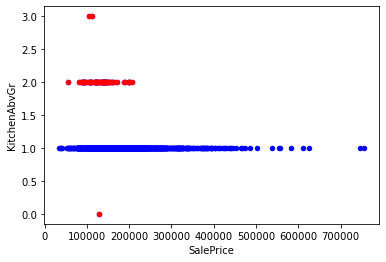

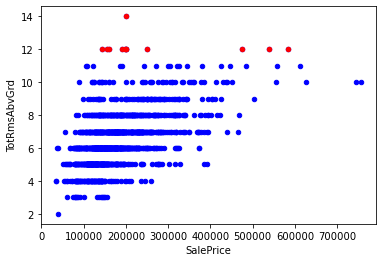

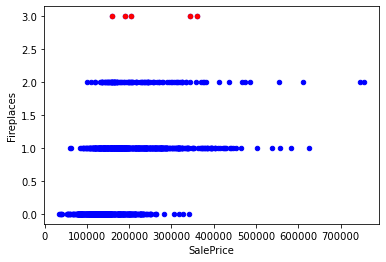

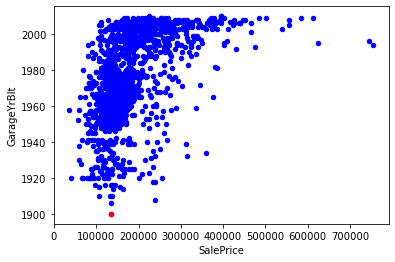

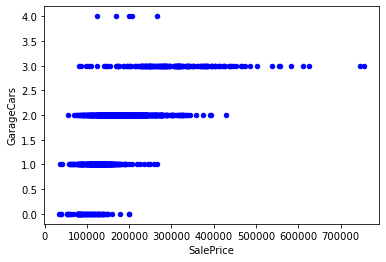

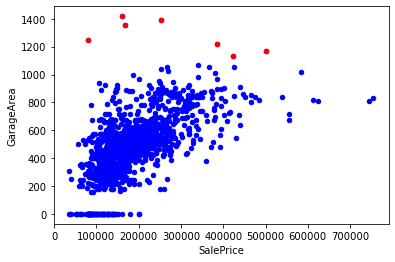

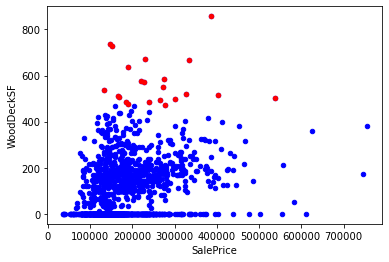

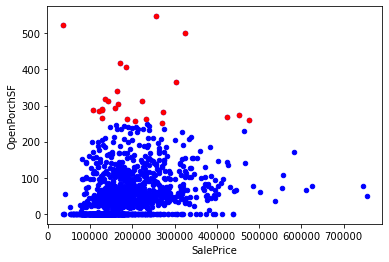

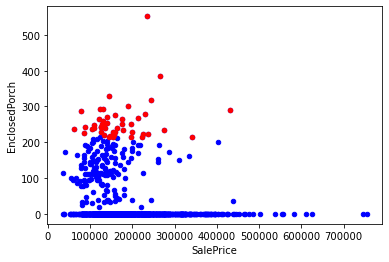

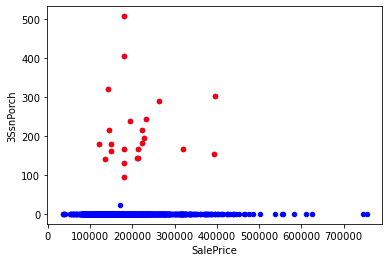

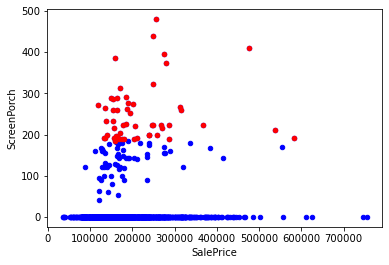

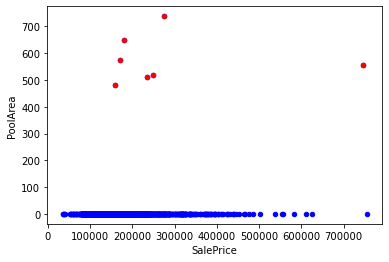

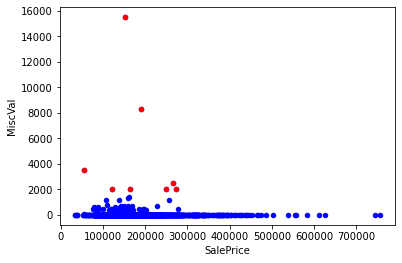

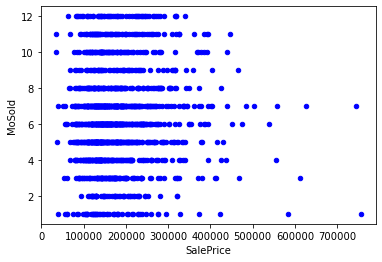

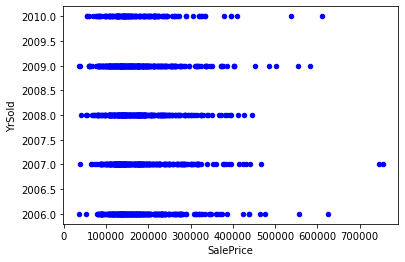

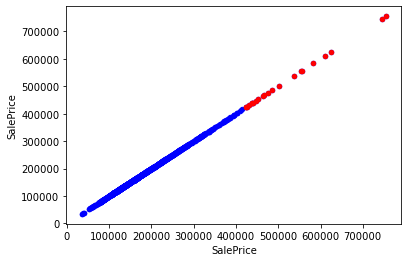

In [14]:
# Check potential outliers
dic_out = {}
for col in data_num.columns:
    data_nna = data_num[data_num[col].notna()]
    data_nna.reset_index(drop=True, inplace=True)
    out_data = np.array(data_nna[col])
    z_score = abs(stats.zscore(out_data))
    out_index = np.where(z_score > 3)
    out_count = len(out_index[0])
    dic_out[col] = {}
    dic_out[col]['values'] = data_num[col].dropna()
    dic_out[col]['z_score'] = z_score
    dic_out[col]['out_index'] = list(out_index[0])
    dic_out[col]['out_count '] = out_count
    # Plot
    fig = plt.figure(col + ' outliers')
    ax0 = fig.add_subplot(1, 1, 1)
    data_nna.plot.scatter('SalePrice', col, color='b', ax=ax0)
    data_nna.loc[dic_out[col]['out_index'], :].plot.scatter('SalePrice', col, color='r', ax=ax0)

# 3. Data Preparation
<br>


The following steps are taken to prepare the data:
- Select
- Reformat
- Construct (feature engineering)
- Integrate
- Clean

### Select
First, we drop data that is unlikely to be of added value. This applies to "Street", "Utilities", and "Condition1" because these have very low variability (see section Exploration: value count plots), and "Id" (irrelevant). 

In [15]:
data_cat.drop(['Street', 'Utilities', 'Condition1'], axis=1, inplace=True)  # little variability
data_num.drop('Id', axis=1, inplace=True)  # irrelevant
data_num.drop('SalePrice', axis=1, inplace=True)  # dependent variable

### Reformat
Some of the data needs to be reformatted to numerical data to allow an algorithm (i.e. machine learning model) to "read" these data. 

In addition, the dependent variable SalePrice will be transformed from a right-skewed (see SalePrice histogram in section Exploration) to a normal distribution. In doing so, the machine learning models will be more likely to successfully predict SalePrice for the most expensive houses (not just only the moderately priced houses). For more information please see: [opendatascience.com/transforming-skewed-data](https://opendatascience.com/transforming-skewed-data-for-machine-learning/#:~:text=Skewed%20data%20is%20common%20in,distortion%20from%20a%20normal%20distribution.&text=The%20null%20hypothesis%20for%20this,than%200.05%20indicates%20significant%20skewness).

<AxesSubplot:ylabel='Frequency'>

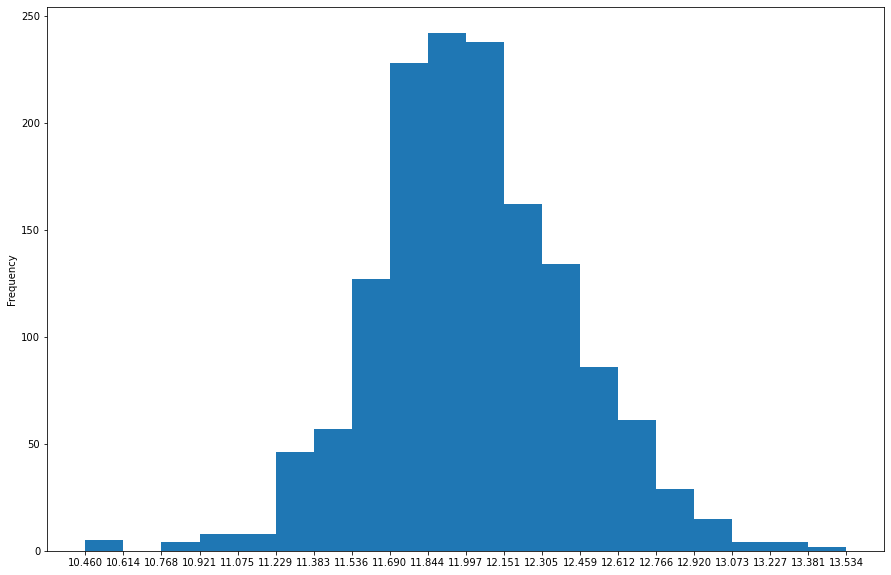

In [16]:
# Reformat ordinal features to numerical (integer)
# Assign an integer to each value type in increasing order
dic_map = {}
dic_map['MSZoning'] = {'C (all)': 1, 'RH': 2, 'RM': 3, 'RL': 4, 'FV': 5}
dic_map['LotShape'] = {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}
dic_map['HouseStyle'] = {'1Story': 1, 'SFoyer': 1, '1.5Unf': 2, '1.5Fin': 3, '2Story': 4, 'SLvl': 4, '2.5Unf': 5, '2.5Fin': 6}
dic_map['ExterCond'] = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
dic_map['BsmtExposure'] = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
dic_map['Functional'] = {'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}
dic_map['GarageCond'] = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
dic_map['BsmtFinType1'] = {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
dic_map['BsmtFinType2'] = {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
dic_map['Alley'] = {'Grvl': 1, 'Pave': 2}
dic_map['Fence'] = {'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
dic_map['PoolQC'] = {'Fa': 1, 'Gd': 1, 'Ex': 1}

map_dis = ['MSZoning', 'LotShape', 'HouseStyle', 'ExterCond', 'BsmtExposure', 'Functional', 'GarageCond', 'BsmtFinType1',
           'BsmtFinType2', 'Alley', 'Fence', 'PoolQC']

for col in map_dis:
    data_cat[col] = data_cat[col].map(dic_map[col])  # Apply map

# Assign an integer to each value type in increasing order (already correctly ordered before (see dic_cat and category vs mean SalePrice plots))
map_ord = ['LandSlope', 'ExterQual', 'HeatingQC', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
           'GarageQual', 'PavedDrive', 'BsmtCond', 'BsmtQual']

for col in map_ord:
    order = dic_cat[col]['#', ].to_dict()  # Set map
    data_cat[col] = data_cat[col].map(order)  # Apply map

# Assign a 1|0 to binomial features
data_cat['CentralAir'].replace(['N', 'Y'], [0, 1], inplace=True)
ord_cols = map_dis + map_ord + ['CentralAir']
data_cat_ord = data_cat.loc[:, ord_cols]

# Reformat nominal features to numerical (int)
data_cat['MiscFeature'].replace(float('nan'), 0, inplace=True)
data_cat_nom = pd.get_dummies(data_cat.drop(ord_cols, axis=1))

# Transform dependent variable (right skewed)
data_dv = np.log1p(data['SalePrice'])
count, bin_edges = np.histogram(data_dv.dropna(), 20)
data_dv.plot(kind='hist', bins=20, xticks=bin_edges, figsize=(15,10))

### Construct (feature engineering)

The following features are constructed:
- Basement Finished Square Feet
- Total Finished Square Feet
- High Quality Finished Square Feet
- Total Full Bathrooms
- Total Half Bathrooms
- Total Bathrooms

In [17]:
# Feature engineering
data_num['BsmtFinSF'] = data_num['TotalBsmtSF'] - data_num['BsmtUnfSF']
data_num['TotalFinSF'] = data_num['BsmtFinSF'] + data_num['GrLivArea']
data_num['HighQualFinSF'] = data_num['TotalFinSF'] - data_num['LowQualFinSF']
data_num['TotalFullBath'] = data_num['FullBath'] + data_num['BsmtFullBath']
data_num['TotalHalfBath'] = data_num['HalfBath'] + data_num['BsmtHalfBath']
data_num['TotalBath'] = data_num['TotalFullBath'] + (data_num['TotalHalfBath'] * 0.5)

### Integrate data
Re-integrate (concatenate) the numerical an categorical data that were previously split-up.

In [18]:
data_idv = pd.concat([data_num, data_cat_ord, data_cat_nom], axis=1)  # independent variables

### Clean
What follows is: 
- Outlier removal (see outlier plots in section Exploration)
- Filling of missing values "nan".

In [19]:
# Remove outliers numerical features (based on scatter plots)
data_idv['LotFrontage'] = [float('nan') if x >300 else x for x in data_idv['LotFrontage']]
data_idv['LotArea'] = [float('nan') if x >100000 else x for x in data_idv['LotArea']]
data_idv['BsmtFinSF1'] = [float('nan') if x >5000 else x for x in data_idv['BsmtFinSF1']]
data_idv['TotalBsmtSF'] = [float('nan') if x >6000 else x for x in data_idv['TotalBsmtSF']]
data_idv['1stFlrSF'] = [float('nan') if x >4000 else x for x in data_idv['1stFlrSF']]
data_idv['GrLivArea'] = [float('nan') if x >4550 else x for x in data_idv['GrLivArea']]


# Replace NA's which equal actual absence of, for instance, a garage or basement with 0:
na_list = ['FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtCond', 'BsmtExposure', 'BsmtQual',
           'BsmtFinType1', 'BsmtFinType2', 'Alley', 'Fence', 'PoolQC']

for col in na_list:
    data_idv[col].replace(float('nan'), 0, inplace=True)

To fill in the remaining missing values we will use the IterativeImputer(). In short, it provides an estimation for missing values based on the values in other features. For more information please see: [IterativeImputer()](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html).

For it to work, we need to rescale all the feature values using the RobustScaler(). Additionally, this also further decreases any negative impact potential outliers may have (that were not removed in previous step). For more information please see: [RobustScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html). 

In [20]:
# Robust Scaler
data_idv_act = data_idv.copy()
transformer = RobustScaler().fit(data_idv)
data_idv = pd.DataFrame(transformer.transform(data_idv))

# Impute NA's values
imputer = IterativeImputer()
imputer.fit(data_idv)
data_idv = pd.DataFrame(imputer.transform(data_idv))
data_idv.columns = data_idv_act.columns

On top of this, we will remove any (multi-)collinear features. When a feature is (multi-)collinear it means that it is highly correlated with another feature in the dataset. This can decrease the generalizability of the trained algorithm/machine learning model to other datasets. 

To determine a feature's (multi-)collinearity the Variance Inflation Factor (VIF) is calculated. Different thresholds are used. It tends to deviate between the VIF being higher than 2.5 or 10. In this case, 5 is selected. Hence, all features with a VIF higher than 5 will be removed. For more information please see: [Collinearity](https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0#:~:text=Collinear%20features%20are%20features%20that,variance%20and%20less%20model%20interpretability.)

In [21]:
# Identify an remove collinear features
vif_info = pd.DataFrame()
vif_info['Feature'] = data_idv.columns
vif_info['VIF'] = [variance_inflation_factor(data_idv.values, i) for i in range(len(data_idv.columns))]
vif_select = vif_info.loc[vif_info['VIF'] < 5]
data_idv = data_idv.loc[:, list(vif_select['Feature'])]

C:\Users\MBRU\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Before moving to the next section, we will split the processed data in a train- and test set again.

In [22]:
data = pd.concat([data_idv, data_dv], axis=1)
train = data.loc[~data['SalePrice'].isnull()]
test = data.loc[data['SalePrice'].isnull()]
test = test.drop('SalePrice', axis=1)
train_dv = train['SalePrice']
train_idv = train.drop('SalePrice', axis=1)

# 4. Modeling

Now the actual modeling will start. There are many different algorithms/models to choose from. Which one to pick may be difficult to decide. To help guide this decision, I found a very nice (simplified) [Machine Learning Algorithm Cheat Sheet](https://blogs.sas.com/content/subconsciousmusings/2020/12/09/machine-learning-algorithm-use/). We will apply the following (supervised learning regression) algorithms:
- Linear
- Ridge
- Lasso
- Elastic Net
- Decision Tree
- Random Forest
- Gradient Boosting Tree
- Light Gradient Boosting Machine
- Extreme Gradient Boosting
- Neural Network

For each algorithm the performance (negative root mean squared error) will be determined using [K-Fold Cross Validation](https://medium.datadriveninvestor.com/k-fold-cross-validation-6b8518070833). 5 Folds are selected instead of, for instance, 10, because the dataset is rather small.

Furthermore, to optimize the performance of the algorithm(s), [Hyperparameter Tuning](https://medium.com/@taniyaghosh29/the-cheatsheet-to-tune-your-hyperparameters-in-machine-learning-and-neural-network-algorithms-ce5c643e5060), if applicable, was applied, and Learning Curves were plotted.

In [23]:
# Set-up a dictionary to store the results
dic_scores = {}
dic_estimators = {}
score = 'neg_root_mean_squared_error'

In [24]:
# Linear
lr = linear_model.LinearRegression()
dic_scores['Linear'] = cross_val_score(lr, train_idv, train_dv, cv=5, scoring=score).mean()  # save score
dic_estimators['Linear'] = lr  # save estimator
print('Linear score: ' + str(round(dic_scores['Linear'], 5)))

Linear score: -0.16119


In [25]:
# Ridge
krr_par_grid = {
    "alpha": [0.0001, 0.001, 0.01],
    "degree": [1, 2],
    "coef0": [1, 2.5],
    }
krr = KernelRidge(kernel='polynomial')
krr_gs = GridSearchCV(estimator=krr, param_grid=krr_par_grid, n_jobs=-1)
krr_gs.fit(train_idv, train_dv)
print('Hyperparameters: '+ str(krr_gs.best_params_))
krr = KernelRidge(**krr_gs.best_params_, kernel='polynomial')
dic_scores['Ridge'] = cross_val_score(krr, train_idv, train_dv, cv=5, scoring=score).mean()
dic_estimators['Ridge'] = krr
print('Ridge score: ' + str(round(dic_scores['Ridge'], 5)))

Hyperparameters: {'alpha': 0.0001, 'coef0': 1, 'degree': 1}
Ridge score: -0.16131


In [26]:
# Lasso
lasso_par_grid = {
    "alpha": [0.0001, 0.001, 0.01],
    }
lasso = Lasso(selection='random')
lasso_gs = GridSearchCV(estimator=lasso, param_grid=lasso_par_grid, n_jobs=-1)
lasso_gs.fit(train_idv, train_dv)
print('Hyperparameters: '+ str(lasso_gs.best_params_))
lasso = Lasso(**lasso_gs.best_params_, selection='random')
dic_scores['Lasso'] = cross_val_score(lasso, train_idv, train_dv, cv=5, scoring=score).mean()
dic_estimators['Lasso'] = lasso
print('Lasso score: ' + str(round(dic_scores['Lasso'], 5)))

Hyperparameters: {'alpha': 0.0001}
Lasso score: -0.16249


In [27]:
# Elastic Net
en_par_grid = {
    "alpha": [0.0075, 0.001, 0.1],
    "l1_ratio": [0.1, 0.2, 0.3],
    "selection": ['random', 'cyclic'],
    "max_iter": [1000, 2000, 3000],
    }
en = ElasticNet()
en_gs = GridSearchCV(estimator=en, param_grid=en_par_grid, n_jobs=-1)
en_gs.fit(train_idv, train_dv)
print('Hyperparameters: '+ str(en_gs.best_params_))
en = ElasticNet(**en_gs.best_params_)
dic_scores['Elastic Net'] = cross_val_score(en, train_idv, train_dv, cv=5, scoring=score).mean()
dic_estimators['Elastic Net'] = en
print('Elastic Net score: ' + str(round(dic_scores['Elastic Net'], 5)))

Hyperparameters: {'alpha': 0.0075, 'l1_ratio': 0.1, 'max_iter': 3000, 'selection': 'random'}
Elastic Net score: -0.1626


In [28]:
# Decision Tree
dt_par_grid = {
    "max_depth": [5, 10, 15],
    "min_samples_split": [8, 10, 12],
    "min_samples_leaf":  [2, 3, 4],
    }
dt = DecisionTreeRegressor(random_state=666)
dt_gs = GridSearchCV(estimator=dt, param_grid=dt_par_grid, n_jobs=-1)
dt_gs.fit(train_idv, train_dv)
print('Hyperparameters: '+ str(dt_gs.best_params_))
dt = DecisionTreeRegressor(**dt_gs.best_params_, random_state=666)
dic_scores['Decision Tree'] = cross_val_score(dt, train_idv, train_dv, cv=5, scoring=score).mean()
dic_estimators['Decision Tree'] = dt
print('Decision Tree score: ' + str(round(dic_scores['Decision Tree'], 5)))

Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 12}
Decision Tree score: -0.21091


In [29]:
# Random Forest
rf_par_grid = {
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf":  [2, 4, 6],
    "n_estimators": [50, 100],
}
rf = RandomForestRegressor(random_state=666)
rf_gs = GridSearchCV(estimator=rf, param_grid=rf_par_grid, n_jobs=-1)
rf_gs.fit(train_idv, train_dv)
print('Hyperparameters: '+ str(rf_gs.best_params_))
rf = RandomForestRegressor(**rf_gs.best_params_, random_state=666)
dic_scores['Random Forest'] = cross_val_score(rf, train_idv, train_dv, cv=5, scoring=score).mean()
dic_estimators['Random Forest'] = rf
print('Random Forest score: ' + str(round(dic_scores['Random Forest'], 5)))

Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest score: -0.16585


In [30]:
# Gradient Boosting Tree
gbt_par_grid = {
    "max_depth": [5, 10, 15],  
    "min_samples_split": [8, 10 ,12],
    "n_estimators": [50, 100],
    "learning_rate": [0.001, 0.01, 0.1],
    }
gbt = GradientBoostingRegressor(random_state=666)
gbt_gs = GridSearchCV(estimator=gbt, param_grid=gbt_par_grid, n_jobs=-1)
gbt_gs.fit(train_idv, train_dv)
print('Hyperparameters: '+ str(gbt_gs.best_params_))
gbt = GradientBoostingRegressor(**gbt_gs.best_params_, random_state=666)
dic_scores['Gradient Boosting Tree'] = cross_val_score(gbt, train_idv, train_dv, cv=5, scoring=score).mean()
dic_estimators['Gradient Boosting Tree'] = gbt
print('Gradient Boosting Tree score: ' + str(round(dic_scores['Gradient Boosting Tree'], 5)))

Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 12, 'n_estimators': 100}
Gradient Boosting Tree score: -0.16105


In [31]:
# Light Gradient Boosting Machine
lgbmr_par_grid = {
    "max_depth": [5, 10, 15],
    "num_leaves":  [2, 4, 6],
    "n_estimators": [10, 50, 100],
    "learning_rate": [0.001, 0.01, 0.1],
    "reg_alpha": [0.01, 0.1, 1],
    "reg_lambda": [1, 10, 100],
    }
lgbmr = LGBMRegressor(objective='regression', random_state=666)
lgbmr_gs = GridSearchCV(estimator=lgbmr, param_grid=lgbmr_par_grid, n_jobs=-1)
lgbmr_gs.fit(train_idv, train_dv)
print('Hyperparameters: '+ str(lgbmr_gs.best_params_))
lgbmr = LGBMRegressor(**lgbmr_gs.best_params_, objective='regression', random_state=666)
dic_scores['Light Gradient Boosting Machine'] = cross_val_score(lgbmr, train_idv, train_dv, cv=5, scoring=score).mean()
dic_estimators['Light Gradient Boosting Machine'] = lgbmr
print('Light Gradient Boosting Machine score: ' + str(round(dic_scores['Light Gradient Boosting Machine'], 5)))

Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 6, 'reg_alpha': 0.1, 'reg_lambda': 1}
Light Gradient Boosting Machine score: -0.15918


In [32]:
# Extreme Gradient Boosting
xgbr_par_grid = {
    "max_depth": [5, 10, 15],
    "n_estimators": [10, 50, 100],
    "learning_rate": [0.001, 0.01, 0.1],
    "reg_alpha": [0, 0.01, 0.1],
    "reg_lambda": [0.01, 0.1, 1],
}
xgbr = XGBRegressor(objective='reg:squarederror', random_state=666)
xgbr_gs = GridSearchCV(estimator=xgbr, param_grid=xgbr_par_grid, n_jobs=-1)
xgbr_gs.fit(train_idv, train_dv)
print('Hyperparameters: '+ str(xgbr_gs.best_params_))
xgbr = XGBRegressor(**xgbr_gs.best_params_, objective='reg:squarederror', random_state=666)
dic_scores['Extreme Gradient Boosting'] = cross_val_score(xgbr, train_idv, train_dv, cv=5, scoring=score).mean()
dic_estimators['Extreme Gradient Boosting'] = xgbr
print('Extreme Gradient Boosting score: ' + str(round(dic_scores['Extreme Gradient Boosting'], 5)))

Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0.1}
Extreme Gradient Boosting score: -0.15768


In [33]:
# Neural Network
nn_par_grid = {
    "alpha": [1, 10],
    "solver": ['lbfgs'],  # 'sgd', 'adam'
    "hidden_layer_sizes": [(10,), (20,)],
    }
nn = MLPRegressor(max_iter=5000, random_state=666)
nn_gs = GridSearchCV(estimator=nn, param_grid=nn_par_grid, n_jobs=-1)
nn_gs.fit(train_idv, train_dv)
print('Hyperparameters: '+ str(nn_gs.best_params_))
nn = MLPRegressor(**nn_gs.best_params_, max_iter=5000, random_state=666)
dic_scores['Neural Network'] = cross_val_score(nn, train_idv, train_dv, cv=5, scoring=score).mean()
dic_estimators['Neural Network'] = nn
print('Neural Network score: ' + str(round(dic_scores['Neural Network'], 5)))

Hyperparameters: {'alpha': 10, 'hidden_layer_sizes': (20,), 'solver': 'lbfgs'}
Neural Network score: -0.1648


Now, comparing the scores below, we can see that Extreme Gradient Boosting is the best performing algorithm/model.

In [34]:
# Select model
df_scores = pd.DataFrame.from_dict(dic_scores, orient='index').sort_values(by=0, axis=0, ascending=False)
estimator = dic_estimators[df_scores.index[0]]
print(df_scores)

                                        0
Extreme Gradient Boosting       -0.157681
Light Gradient Boosting Machine -0.159180
Gradient Boosting Tree          -0.161054
Linear                          -0.161189
Ridge                           -0.161311
Lasso                           -0.162490
Elastic Net                     -0.162596
Neural Network                  -0.164801
Random Forest                   -0.165850
Decision Tree                   -0.210906


To determine how to further improve the Extreme Gradient Boosting algorithm/model, we can look at whether it is overfitting (high variance) or underfitting (high bias) using [Learning Curves](https://pub.towardsai.net/learning-curves-d6cfb49908f0).

If overfitting we could:
- Decrease number of features
- Increase training samples
- Increase lambda (regularization)

If underfitting:
- Increase number of features
- Adding polynomial features
- Decrease lambda (deregularization)

In this case, the Learning Curves (below) indicates overfitting.

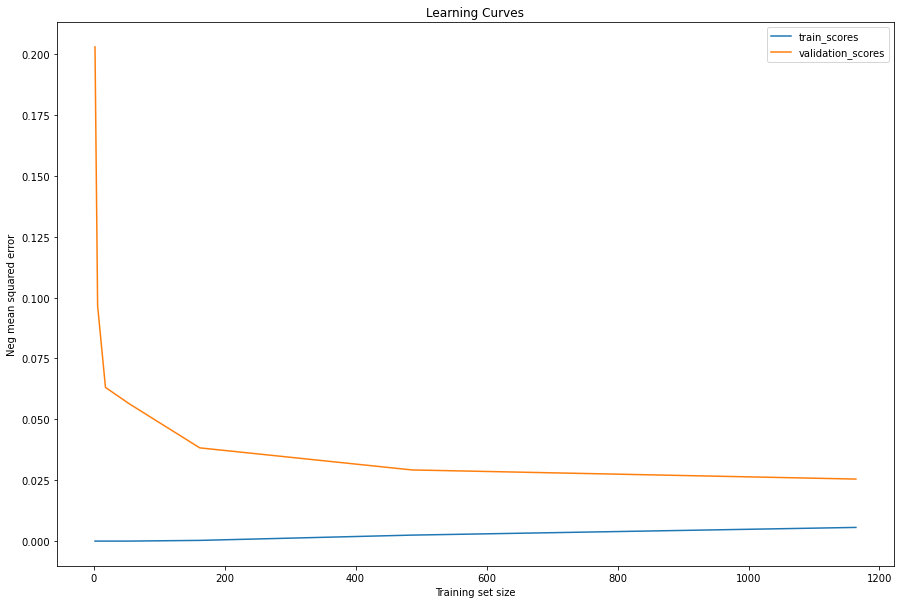

In [35]:
# Learning curves (Bias or Variance?)
train_sizes = [2, 6, 18, 54, 162, 486, 1164]
train_sizes, train_scores, validation_scores = learning_curve(estimator=estimator, X=train_idv, y=train_dv,
                                                              train_sizes=train_sizes, cv=5,
                                                              scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
df_lc = pd.DataFrame()
df_lc['train_scores'] = pd.Series(train_scores_mean)
df_lc['validation_scores'] = pd.Series(validation_scores_mean)
df_lc.set_index(train_sizes, inplace=True)

# Plot learning curves
fig = plt.figure('Learning Curves')
ax0 = fig.add_subplot(1, 1, 1)
df_lc.plot(kind='line', ax=ax0, figsize=(15,10))
plt.xlabel('Training set size')
plt.ylabel('Neg mean squared error')
plt.title('Learning Curves')
plt.legend()

This shows that a decrease of the number of features could improve the performance. To determine what the optimum number of features could be, we are going to apply [Recursive Feature Elimination with Cross-Validation](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py#). The resultant plot below indicates 37 could be the optimum amount.

Optimal number of features : 37


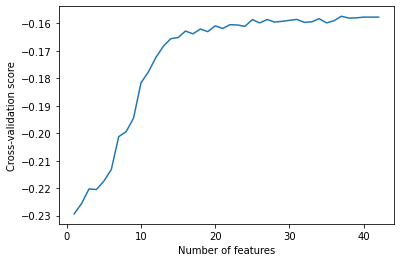

In [36]:
# Feature selection
rfecv = RFECV(estimator=estimator, step=1, cv=5, scoring=score)
rfecv.fit(train_idv, train_dv)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS cross-validation scores
plt.figure('Recursive Feature Elimination')
plt.xlabel('Number of features')
plt.ylabel('Cross-validation score')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Next, we select the top 37 features, train the algorithm once more, and store the result in the dataframe "output" for upload.

In [38]:
# Apply feature selection
train_idv_fs = train_idv.loc[:, rfecv.support_]

# RUN
estimator.fit(train_idv_fs, train_dv)

test_fs = test.loc[:, rfecv.support_].copy()
test_fs['SalePrice'] = estimator.predict(test_fs)
test_fs['SalePrice'] = np.expm1(test_fs['SalePrice'])  # revert log transformation
test_fs.reset_index(drop=True, inplace=True)
test_fs['Id'] = test0['Id']

# OUTPUT
output = pd.DataFrame(test_fs.loc[:, ['Id', 'SalePrice']])
output.to_csv(r'C:\Users\MBRU\Desktop\house_sales_prediction.csv')

## Thanks for checking out my notebook!